In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

C:\Users\ganev\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ganev\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\ganev\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\ganev\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tic='USDGBP=X'

In [3]:
start=(datetime.datetime.now() - datetime.timedelta(days=365)).strftime("%Y-%m-%d")
end=datetime.datetime.now().strftime("%Y-%m-%d")
financial_data = web.DataReader(tic, 'yahoo', start, end)


In [4]:
financial_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-18,0.79710,0.79123,0.79577,0.79576,0,0.79576
2019-06-19,0.79028,0.78581,0.79028,0.79010,0,0.79010
2019-06-20,0.79083,0.78589,0.78706,0.78691,0,0.78691
2019-06-23,0.78672,0.78329,0.78428,0.78426,0,0.78426
2019-06-24,0.78663,0.78223,0.78496,0.78495,0,0.78495
...,...,...,...,...,...,...
2020-06-14,0.80281,0.79501,0.79921,0.79944,0,0.79944
2020-06-15,0.79616,0.78820,0.79125,0.79128,0,0.79128
2020-06-16,0.79909,0.79445,0.79467,0.79459,0,0.79459


In [42]:
from datetime import datetime
import MetaTrader5 as mt5
# display data on the MetaTrader 5 package
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)
 
# import the 'pandas' module for displaying data obtained in the tabular form
import pandas as pd
import pytz
 
# establish connection to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
# set time zone to UTC
timezone = pytz.timezone("Etc/UTC")
# create 'datetime' object in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2020, 1, 10, tzinfo=timezone)
# get 10 EURUSD H4 bars starting from 01.10.2020 in UTC time zone
rates = mt5.copy_rates_from("EURUSD", mt5.TIMEFRAME_M15, utc_from, 100)
 
# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()

 
# create DataFrame out of the obtained data
rates_frame = pd.DataFrame(rates)
# convert time in seconds into the datetime format
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
                           
# display data
print("\nDisplay dataframe with data")
rates_frame.head(20)

MetaTrader5 package author:  MetaQuotes Software Corp.
MetaTrader5 package version:  5.0.33

Display dataframe with data


,time,open,high,low,close,tick_volume,spread,real_volume
0,2020-01-08 23:15:00,1.11084,1.11099,1.11084,1.11093,75,3,0
1,2020-01-08 23:30:00,1.11093,1.11093,1.11083,1.11084,97,2,0
2,2020-01-08 23:45:00,1.11084,1.11084,1.11016,1.11053,370,2,0
3,2020-01-09 00:00:00,1.11053,1.11077,1.11033,1.11068,197,3,0
4,2020-01-09 00:15:00,1.11064,1.11132,1.11064,1.11105,178,2,0
5,2020-01-09 00:30:00,1.11099,1.11104,1.11086,1.11102,94,7,0
6,2020-01-09 00:45:00,1.11102,1.11131,1.11088,1.11095,101,5,0
7,2020-01-09 01:00:00,1.11097,1.11097,1.11072,1.11083,105,2,0
8,2020-01-09 01:15:00,1.11083,1.11104,1.11081,1.11102,76,3,0
9,2020-01-09 01:30:00,1.11102,1.11114,1.11097,1.11107,82,2,0


In [43]:
rates_frame=rates_frame.drop(columns=['spread','real_volume'])
rates_frame.columns=["Date","Open","High","Low","Close", "Volume"]
rates_frame=rates_frame.set_index('Date')


In [44]:
df=pd.DataFrame(rates_frame.Close)
mins=pd.DataFrame(df.Close[(df.Close.shift(1) > df.Close) & (df.Close.shift(-1) > df.Close)])
maxs=pd.DataFrame(df.Close[(df.Close.shift(1) < df.Close) & (df.Close.shift(-1) < df.Close)])

Text(0.5, 1, 'EUR/USD')

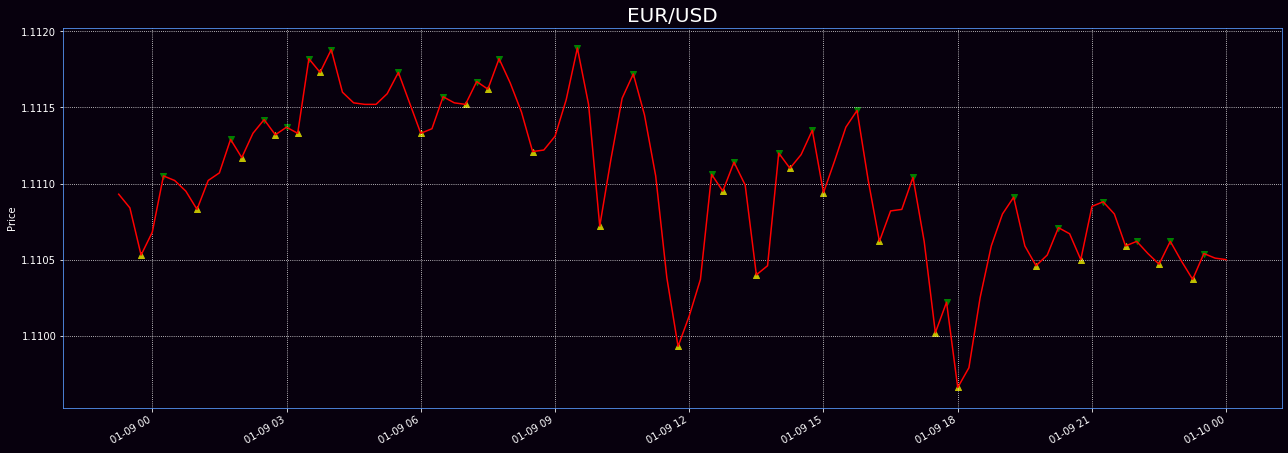

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

fig = plt.figure(figsize=(18,12), facecolor='#07000D')#
ax = plt.subplot2grid((12,4),(0,0), rowspan = 7, colspan = 4, facecolor='#07000D')
ax.grid(linestyle=':', color='w')
ax.yaxis.label.set_color('w')
ax.plot(df.index,df.Close,color='r', label = 'Predictions')
ax.spines['bottom'].set_color("#599Bff")
ax.spines['top'].set_color("#599Bff")
ax.spines['left'].set_color("#599Bff")
ax.spines['right'].set_color("#599Bff")
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')

ax.scatter(maxs.index,maxs.Close,color='g',marker='v')
ax.scatter(mins.index,mins.Close,color='y',marker='^')

plt.ylabel('Price')

fig.autofmt_xdate()
fig.tight_layout()

ax.get_figure().autofmt_xdate()
ax.set_title('EUR/USD', color='w', fontsize = 20)

#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d %H'))